In [37]:
import tensorflow as tf
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../../data/drug200.csv')


In [3]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:

df = pd.get_dummies(df)
df.head()


,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,1,0,1,0,0,1,0,1,0,0,0,0
1,47,13.093,0,1,0,1,0,1,0,0,0,0,1,0
2,47,10.114,0,1,0,1,0,1,0,0,0,0,1,0
3,28,7.798,1,0,0,0,1,1,0,0,0,0,0,1
4,61,18.043,1,0,0,1,0,1,0,1,0,0,0,0


In [21]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5:].values


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

Text(0.5, 1.05, 'Correlation of WBCD Features')

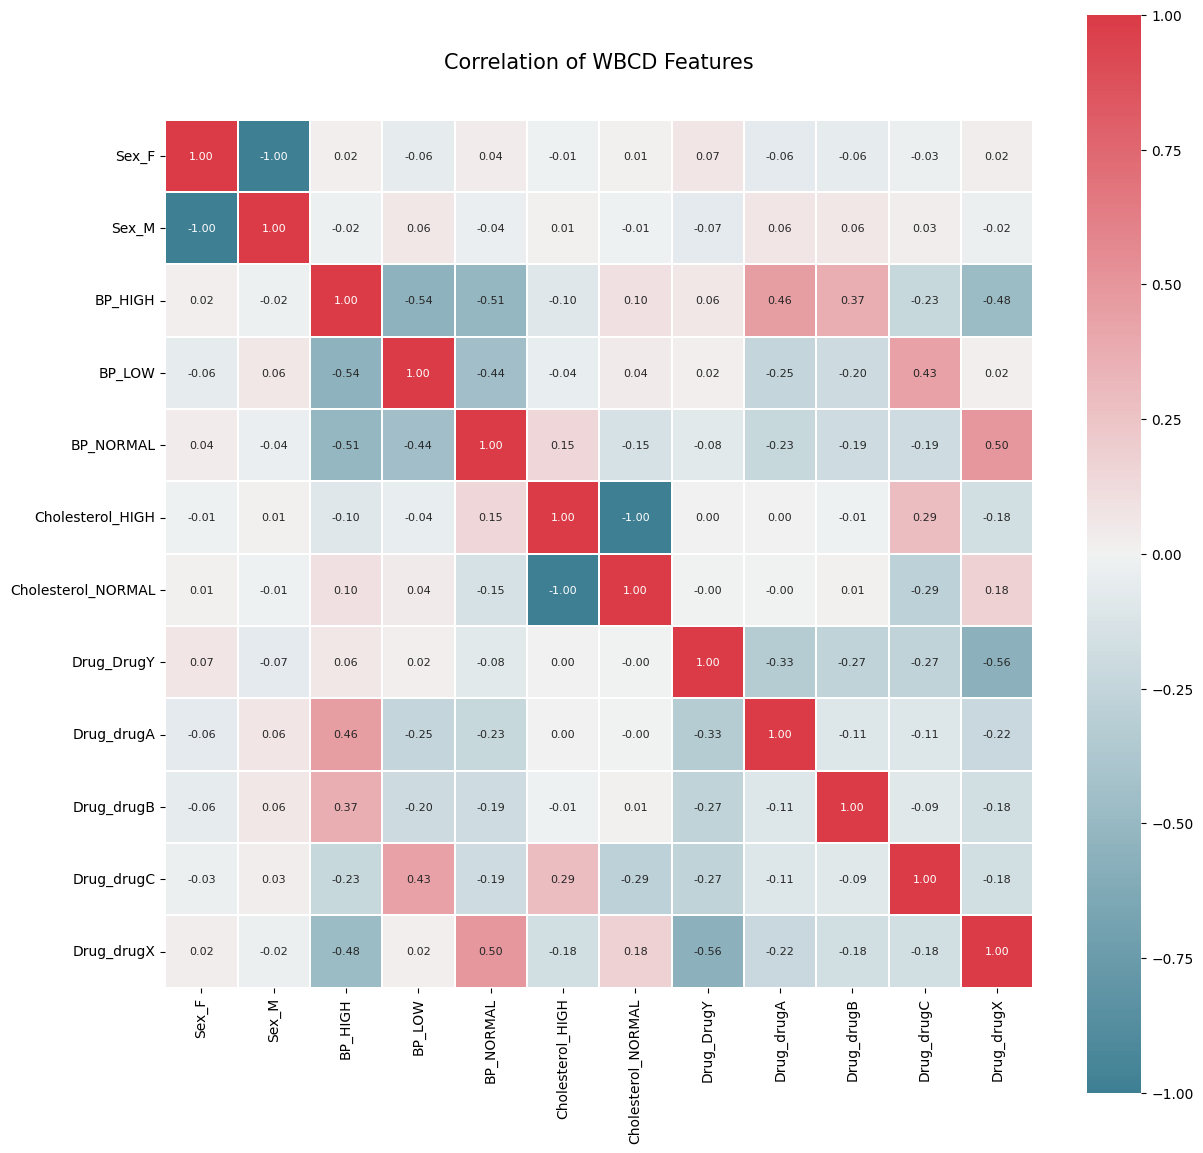

In [25]:
corr = df.iloc[:, 2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cbar=True,  square=True, annot=True, fmt='.2f', annot_kws={'size': 8},
            cmap=colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of WBCD Features', y=1.05, size=15)


In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
ann = tf.keras.Sequential()


In [28]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))


In [29]:
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)[:]
label = np.argmax(y_test,axis=1)[:]
for i in range(20):
    print("Predicted %d---> Expected %d"%(y_pred[i],label[i]))

1/1 [==============================] - 0s 21ms/step
Predicted 1---> Expected 1
Predicted 1---> Expected 3
Predicted 1---> Expected 0
Predicted 1---> Expected 0
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 3
Predicted 1---> Expected 3
Predicted 1---> Expected 3
Predicted 1---> Expected 1
Predicted 1---> Expected 2
Predicted 1---> Expected 2
Predicted 1---> Expected 0
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 1
Predicted 1---> Expected 0
Predicted 1---> Expected 2
Predicted 1---> Expected 3
Predicted 1---> Expected 0


In [39]:
cm = confusion_matrix(y_pred,label)
acc = accuracy_score(y_pred,label)
cm

array([[ 0,  0,  0,  0],
       [10,  9,  4,  7],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [40]:
acc


0.3